# COVID-19 Data Collection (California)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Collection

In [3]:
# data collected from John Hopkins Coronavirus Resource Center github
# this is aggregated data from multiple sources updated Oct 16 2020
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-16-2020.csv'

covid = pd.read_csv(url)

In [4]:
covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-17 04:24:12,33.93911,67.709953,40073,1485,33516,5072.0,Afghanistan,102.940426,3.705737
1,NaN,NaN,NaN,Albania,2020-10-17 04:24:12,41.15330,20.168300,16501,443,9957,6101.0,Albania,573.389395,2.684686
2,NaN,NaN,NaN,Algeria,2020-10-17 04:24:12,28.03390,1.659600,53998,1841,37856,14301.0,Algeria,123.139602,3.409386
3,NaN,NaN,NaN,Andorra,2020-10-17 04:24:12,42.50630,1.521800,3377,59,2057,1261.0,Andorra,4370.672361,1.747113
4,NaN,NaN,NaN,Angola,2020-10-17 04:24:12,-11.20270,17.873900,7222,234,3012,3976.0,Angola,21.973897,3.240100


In [5]:
# The data contain from information from all over the world. Get rid of everything but California data
covid_ca = covid[covid['Province_State'] == 'California'] 

In [6]:
covid_ca.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
822,6001.0,Alameda,California,US,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,"Alameda, California, US",1340.729443,1.959122
823,6003.0,Alpine,California,US,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,"Alpine, California, US",265.721878,0.000000
824,6005.0,Amador,California,US,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,"Amador, California, US",777.319380,5.177994
825,6007.0,Butte,California,US,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,"Butte, California, US",1368.700556,1.666667
826,6009.0,Calaveras,California,US,2020-10-17 04:24:12,38.205371,-120.552913,331,16,0,315.0,"Calaveras, California, US",721.054351,4.833837


In [7]:
covid_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 822 to 880
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 59 non-null     float64
 1   Admin2               59 non-null     object 
 2   Province_State       59 non-null     object 
 3   Country_Region       59 non-null     object 
 4   Last_Update          59 non-null     object 
 5   Lat                  58 non-null     float64
 6   Long_                58 non-null     float64
 7   Confirmed            59 non-null     int64  
 8   Deaths               59 non-null     int64  
 9   Recovered            59 non-null     int64  
 10  Active               59 non-null     float64
 11  Combined_Key         59 non-null     object 
 12  Incidence_Rate       58 non-null     float64
 13  Case-Fatality_Ratio  58 non-null     float64
dtypes: float64(6), int64(3), object(5)
memory usage: 6.9+ KB


In [8]:
covid_ca[covid_ca['Incidence_Rate'].isna()]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
877,90006.0,Unassigned,California,US,2020-10-17 04:24:12,NaN,NaN,0,0,0,0.0,"Unassigned, California, US",NaN,NaN


In [9]:
# I'm getting rid of this row containing data from unassigned regions.
covid_ca = covid_ca[covid_ca['Incidence_Rate'].isna() == False]

In [10]:
covid_ca.isna().sum()

FIPS                   0
Admin2                 0
Province_State         0
Country_Region         0
Last_Update            0
Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Combined_Key           0
Incidence_Rate         0
Case-Fatality_Ratio    0
dtype: int64

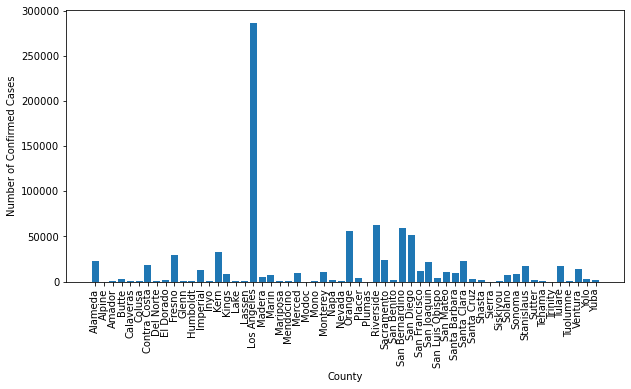

In [11]:
plt.figure(figsize=(10, 5))
plt.bar(covid_ca['Admin2'], covid_ca['Confirmed'])
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Number of Confirmed Cases');

Maybe we can put categories to each count depending on the number of cases. (e.g. 'extreme hotspot', 'hotspot' etc) 

In [12]:
# write data to file
covid_ca.to_csv('../../data/california_covid.csv', index=False)